# KNN 算法

### 什么是kNN算法  

**kNN(k-nearest neighbors)**，中文翻译为K近邻,是一个思想很简单，应用数学知识少，用来解决分类问题的算法。  
![knn](./knn01.jpg)

如图，是一个肿瘤病人的相关数据，横轴代表一个特征，是指病人的一个肿瘤大小，纵轴是指发现肿瘤的时间；对于每一个病人，他的肿瘤大小和发现的时间就构成了这个图像上的一个点，对于这个点，我们在图像上就能看出它是恶性肿瘤还是良性肿瘤（蓝色属于恶性，红色属性良性）。

现在新来了一个病人，这个病人的特征在图上用绿色的点来表示，那如何来判断该病人是属于良性肿瘤患者还是恶性肿瘤患者？
首先，我们必须先取一个k值，如图，假设我们k值取的是3，knn算法做的是在所有的数据点中寻找离这个新数据点最近的三个点，然后这些的点，以它们自己的结果(良性或恶性)进行投票，图上红色和蓝色的比率是2：1，因此，k近邻算法判断新来病人很大的概率是良性肿瘤患者。

k近邻算法中的k值就是我们要找最近的k个样本值来进行投票计算。

### 欧拉距离

新的样本点是如何与其他数据点进行距离计算的呢？
对于两个特征点它们的距离，我们首先使用最为常见的欧拉距离，下图是欧拉距离的数学公式。

![欧拉公式](./knn02.png)  

##### 通过扩展得到如下公式
![欧拉公式2](./knn03.png)

### kNN的过程

In [1]:
import numpy as np
import matplotlib.pyplot as plt

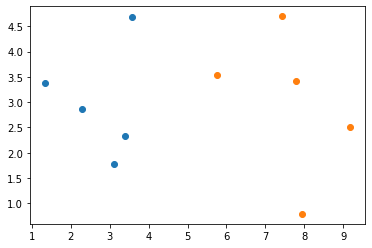

In [2]:
# 生成测试数据
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

# 生成图像
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])
plt.show()

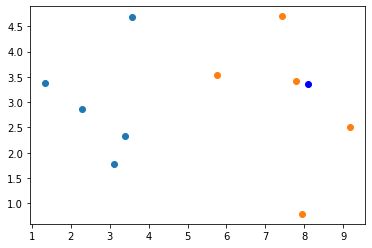

In [3]:
# 预测新的的样本
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])
plt.scatter(x[0], x[1], color='b')
plt.show()

In [6]:
from math import sqrt
from collections import Counter

# 欧拉公式代码实现
distances = [sqrt(np.sum((x_train - x)**2))
             for x_train in X_train]

# 进行排序，返回的是 排序后结果对应元素的索引
nearest = np.argsort(distances)

# k 值取5，取最近5的数据点进行投票
k = 5
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]

# 进行投票，返回的就是结果
predict_y = Counter(topK_y).most_common(1)[0][0]

predict_y

1

## 使用scikit-learn中的kNN
### 预测鸢尾花数据集

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
# 加载数据集
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [3]:
# 拆分测试与训练数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [4]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [5]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [6]:
# 训练
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [7]:
# 预测
y_predict = knn_clf.predict(X_test)
y_predict

array([1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2])

In [8]:
# 预测准确率
knn_clf.score(X_test,y_test)

1.0

### 手写数字识别

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [10]:
# 加载手写数字
digits = datasets.load_digits()

X = digits.data
y = digits.target

3


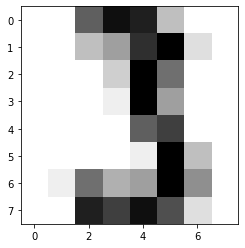

In [11]:
# 还原某一行数字
some_digit = X[60]
print(y[60])
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.show()

In [12]:
# 拆分测试与训练数据集
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
# 训练
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
# 预测
y_predict = knn_clf.predict(X_test)
y_predict

array([0, 0, 7, 1, 8, 4, 3, 7, 7, 2, 5, 1, 7, 0, 5, 0, 1, 3, 7, 7, 8, 9,
       6, 3, 5, 6, 2, 0, 4, 5, 3, 0, 7, 2, 6, 7, 3, 6, 6, 9, 2, 9, 3, 9,
       9, 5, 8, 2, 1, 8, 3, 8, 2, 3, 5, 1, 9, 8, 8, 7, 5, 0, 2, 9, 0, 1,
       0, 0, 6, 8, 0, 7, 8, 0, 1, 7, 7, 8, 8, 9, 1, 0, 7, 2, 5, 9, 3, 7,
       1, 8, 8, 2, 2, 9, 4, 4, 5, 5, 8, 0, 3, 2, 0, 5, 8, 3, 3, 6, 9, 9,
       8, 3, 4, 3, 9, 6, 8, 3, 1, 8, 1, 1, 9, 2, 1, 8, 1, 6, 2, 3, 8, 6,
       7, 6, 4, 8, 7, 6, 1, 6, 9, 1, 3, 3, 4, 2, 4, 0, 5, 4, 4, 1, 9, 9,
       0, 7, 0, 2, 0, 2, 0, 9, 7, 8, 5, 1, 2, 6, 8, 1, 9, 4, 1, 7, 1, 1,
       0, 2, 2, 2, 7, 8, 6, 3, 3, 1, 8, 4, 1, 9, 0, 2, 8, 6, 5, 7, 9, 4,
       1, 9, 7, 0, 4, 0, 0, 7, 5, 6, 9, 3, 2, 1, 2, 1, 6, 2, 4, 9, 6, 4,
       3, 9, 9, 4, 7, 9, 9, 7, 5, 8, 0, 5, 6, 9, 5, 7, 1, 7, 5, 9, 7, 4,
       9, 4, 4, 5, 1, 3, 6, 0, 5, 9, 8, 6, 5, 1, 1, 0, 3, 4, 9, 0, 2, 2,
       5, 5, 0, 3, 0, 9, 5, 7, 6, 2, 9, 6, 2, 6, 5, 9, 4, 2, 6, 2, 2, 4,
       6, 6, 9, 3, 8, 6, 7, 7, 7, 9, 6, 9, 1, 4, 3,

In [15]:
# 预测准确率
knn_clf.score(X_test,y_test)

0.98